# Analysis of experiments
Date: 22-01-2024

Goals are to
- [DONE] visualize the evolution of the energy consumption of the server and the clients during the training
- [DONE] visualize the evolution of the local and global loss/accuracy
- [DONE] Compute the local/total energy consumption of each experiments
- Compare experiments
    - complete experiment_summary with 
        - final accuacry (centralized, distributed max, dist avg)
        - [DONE] total energy
        - energy per client
        - number of rounds to reach accuracy
        - training time
- Compute the energy consumption of each round for each hosts/clients
    - study the impact of training several clients on one host
- is the energy consumed by each round stable? How does the number of epoch impacts it?

Remarks:
- Power is in milliwatts
- outputcifar10/fedavg
    - issue with host7: no energy data for most of the experiments

## Imports and paths

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from pathlib import Path
import glob
import time
from datetime import datetime
import sys
sys.path.append('/home/mjay/FL-G5K-Test/src/utils')

from process_results import EnergyResult, read_summaryfile, config_drop, compute_exp_energy_per_host, compute_host_energy, compute_exp_energy

In [18]:
# outputs_path = "/home/mjay/energyfl/outputcifar10/fedadagrad/labelskew"
# outputs_path = "/home/mjay/energyfl/outputcifar10/fedadam/labelskew"
# outputs_path = "/home/mjay/energyfl/outputcifar10/fedavg/labelskew"
outputs_path = "/home/mjay/energyfl/outputcifar10/fedyogi/labelskew"

In [19]:
summary_path = os.path.join(outputs_path,"experiment_summary.csv")
summaryfile = read_summaryfile(summary_path)

In [20]:
cols = ["timestamps.end_experiment_after_sleep", "timestamps.end_experiment", "timestamps.start_experiment", "timestamps.start_experiment_before_sleep", "result_folder", "energy_file", "server", "estats-11", "estats-12", "estats-2", "estats-3", "estats-4", "estats-5", "estats-6", "estats-7", "estats-8", "estats-9"]
summaryfile.drop(columns=cols).style.background_gradient(cmap='viridis', low=0.2, high=0.2, axis=0)

,sleep_duration,neuralnet,strategy,optimizer,params.num_rounds,params.num_clients_per_round_fit,params.num_clients_per_round_eval,params.min_available_clients,params.fraction_fit,params.fraction_evaluate,params.wait_round,params.lr,params.num_groups,data.data_name,data.batch_size,data.validation_split,data.num_clients,data.alpha,data.partition,client.lr,client.local_epochs,client.decay_rate,client.decay_steps,comm.host,comm.port
0,30,ResNet18,fedyogi,SGD,2000,10,10,60,0.100000,0.300000,30,0.010000,32,CIFAR10,50,20,100,0.500000,label_skew,0.030000,3,1,1,172.16.121.10,8080
1,30,ResNet18,fedyogi,SGD,2000,10,10,60,0.100000,0.300000,100,0.010000,32,CIFAR10,20,20,100,0.500000,label_skew,0.031600,10,1,1,172.16.121.10,8080
2,30,ResNet18,fedyogi,SGD,2000,10,10,60,0.100000,0.300000,100,0.010000,32,CIFAR10,20,20,100,0.500000,label_skew,0.031600,20,1,1,172.16.121.10,8080
3,30,ResNet18,fedyogi,SGD,2000,10,10,60,0.100000,0.300000,100,0.010000,32,CIFAR10,20,20,100,0.500000,label_skew,0.031600,5,1,1,Failed,8080
4,30,ResNet18,fedyogi,SGD,2000,10,10,60,0.100000,0.300000,30,0.010000,32,CIFAR10,20,20,100,0.500000,label_skew,0.031600,5,1,1,172.16.121.10,8080
5,30,ResNet18,fedyogi,SGD,2000,10,10,60,0.100000,0.300000,30,0.010000,32,CIFAR10,20,20,100,0.500000,label_skew,0.031600,20,1,1,172.16.121.10,8080
6,30,ResNet18,fedyogi,SGD,2000,10,10,60,0.100000,0.300000,30,0.010000,32,CIFAR10,20,20,100,0.500000,label_skew,0.031600,10,1,1,172.16.121.10,8080


In [21]:
results_dir_ls = summaryfile["result_folder"].tolist()
summaryfile_dict = summaryfile.to_dict(orient="records")

In [22]:
host_summaries = pd.DataFrame()
for exp_id in range(len(summaryfile)):
    host_summary, exp_summary = compute_exp_energy(exp_id, summaryfile, outputs_path)
    if host_summary is not None:
        host_summaries = pd.concat([host_summaries, host_summary], ignore_index=True)

Processing experiment /home/mjay/energyfl/outputcifar10/fedyogi/labelskew/2024-02-29_17-52-05
Processing experiment /home/mjay/energyfl/outputcifar10/fedyogi/labelskew/2024-02-29_19-03-38
Processing experiment /home/mjay/energyfl/outputcifar10/fedyogi/labelskew/2024-03-01_03-11-35
Folder /home/mjay/energyfl/outputcifar10/fedyogi/labelskew/2024-03-01_03-11-35 does not exist
Processing experiment /home/mjay/energyfl/outputcifar10/fedyogi/labelskew/2024-03-01_11-08-10
Folder /home/mjay/energyfl/outputcifar10/fedyogi/labelskew/2024-03-01_11-08-10 does not exist
Processing experiment /home/mjay/energyfl/outputcifar10/fedyogi/labelskew/2024-03-01_11-33-51
Processing experiment /home/mjay/energyfl/outputcifar10/fedyogi/labelskew/2024-03-01_14-22-02
Processing experiment /home/mjay/energyfl/outputcifar10/fedyogi/labelskew/2024-03-01_19-45-20


In [ ]:
result_plot = {
    "loss": ["results","server_round","loss","losses_centralized","losses_distributed"],}
    # "accuracy": ["results","server_round","accuracy","acc_centralized","acc_distributed"]}

In [ ]:
resid = 4
print(results_dir_ls[resid])
summaryfile_dict[resid]

/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_22-01-00


{'result_folder': '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_22-01-00',
 'energy_file': 'energy.csv',
 'server': 'estats-10.toulouse.grid5000.fr',
 'sleep_duration': 30,
 'neuralnet': 'ResNet18',
 'strategy': 'fedavg',
 'optimizer': 'SGD',
 'estats-11': '[0 1 2 3 4 5 6 7 8 9]',
 'estats-12': '[10 11 12 13 14 15 16 17 18 19]',
 'estats-2': '[20 21 22 23 24 25 26 27 28 29]',
 'estats-3': '[30 31 32 33 34 35 36 37 38 39]',
 'estats-4': '[40 41 42 43 44 45 46 47 48 49]',
 'estats-5': '[50 51 52 53 54 55 56 57 58 59]',
 'estats-6': '[60 61 62 63 64 65 66 67 68 69]',
 'estats-7': '[70 71 72 73 74 75 76 77 78 79]',
 'estats-8': '[80 81 82 83 84 85 86 87 88 89]',
 'estats-9': '[90 91 92 93 94 95 96 97 98 99]',
 'timestamps.start_experiment_before_sleep': '2024-03-02_22-01-10_630930',
 'timestamps.start_experiment': '2024-03-02_22-01-40_661210',
 'timestamps.end_experiment': '2024-03-02_23-24-42_224458',
 'timestamps.end_experiment_after_sleep': '2024-03-02_23-25-12_254898',

In [ ]:
result = EnergyResult(results_dir_ls[resid],summaryfile)
estats_match = result._match_host_estats()
server = result._read_server()
hostname, host_energy = result.client_host_energy()

Host 7 doesn't have an energy file: [Errno 2] No such file or directory: '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_22-01-00/client_host_7/energy.csv'


In [ ]:
attribute, col1, col2 = "energy",'timestamp',"tot avg power (mW)"
for col2 in host_energy[0].columns.drop('timestamp'):
    plt.figure(figsize=(10,5))
    for hid in range(len(host_energy)):
        plt.plot(pd.to_datetime(host_energy[hid][col1],format='mixed'), host_energy[hid][col2], label=f"{hostname[hid]}") # .dt.strftime('%H:%M:%S')
    plt.plot(pd.to_datetime(server.__getattribute__(attribute)[col1],format='%Y-%m-%d %H:%M:%S.%f'), server.__getattribute__(attribute)[col2], label="Server")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.show()

In [ ]:
config = summaryfile_dict[resid]
config = config_drop(config)
result.make_server_plot(config,centralized=True, **result_plot)

In [ ]:
summaryfile_dict[resid]

{'result_folder': '/home/mjay/energyfl/outputcifar10/fedavg/labelskew/2024-03-02_12-02-33',
 'energy_file': 'energy.csv',
 'server': 'estats-10.toulouse.grid5000.fr',
 'sleep_duration': 30,
 'neuralnet': 'ResNet18',
 'strategy': 'fedavg',
 'optimizer': 'SGD',
 'estats-11': '[0 1 2 3 4 5 6 7 8 9]',
 'estats-12': '[10 11 12 13 14 15 16 17 18 19]',
 'estats-2': '[20 21 22 23 24 25 26 27 28 29]',
 'estats-3': '[30 31 32 33 34 35 36 37 38 39]',
 'estats-4': '[40 41 42 43 44 45 46 47 48 49]',
 'estats-5': '[50 51 52 53 54 55 56 57 58 59]',
 'estats-6': '[60 61 62 63 64 65 66 67 68 69]',
 'estats-7': '[70 71 72 73 74 75 76 77 78 79]',
 'estats-8': '[80 81 82 83 84 85 86 87 88 89]',
 'estats-9': '[90 91 92 93 94 95 96 97 98 99]',
 'timestamps.start_experiment_before_sleep': '2024-03-02_12-02-42_944797',
 'timestamps.start_experiment': '2024-03-02_12-03-12_965713',
 'timestamps.end_experiment': '2024-03-02_13-56-12_512741',
 'timestamps.end_experiment_after_sleep': '2024-03-02_13-56-42_541196',

In [ ]:
host_energy[hid]

,timestamp,RAM%,GPU%,GPU inst power (mW),GPU avg power (mW),CPU%,CPU inst power (mW),CPU avg power (mW),tot inst power (mW),tot avg power (mW)
0,2024-03-02 12:02:44.246344,1,0,0,0,100,2972,2972,8326,8326
1,2024-03-02 12:02:45.217953,1,0,0,0,762,1344,2158,6663,7494
2,2024-03-02 12:02:46.219778,1,0,0,0,300,1056,1607,6279,6886
3,2024-03-02 12:02:47.221005,1,0,0,0,287,960,1283,6183,6533
4,2024-03-02 12:02:48.219964,1,0,0,0,300,960,1121,6183,6356
...,...,...,...,...,...,...,...,...,...,...
6831,2024-03-02 13:56:38.134266,13,0,0,0,262,960,963,6399,6402
6832,2024-03-02 13:56:39.136153,13,0,0,0,237,960,961,6399,6400
6833,2024-03-02 13:56:40.133302,13,0,0,0,250,960,960,6399,6399
6834,2024-03-02 13:56:41.134260,13,0,0,0,287,1056,1008,6495,6447


## Visualisation of raw csvs

In [ ]:
mycsv.fittimes

NameError: name 'mycsv' is not defined

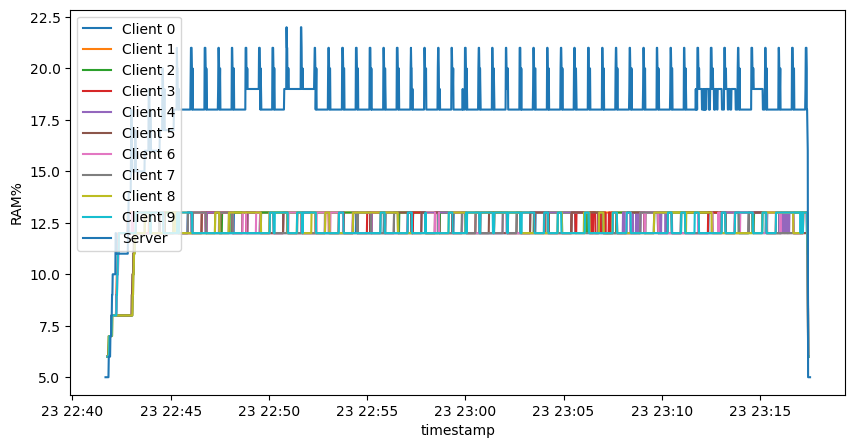

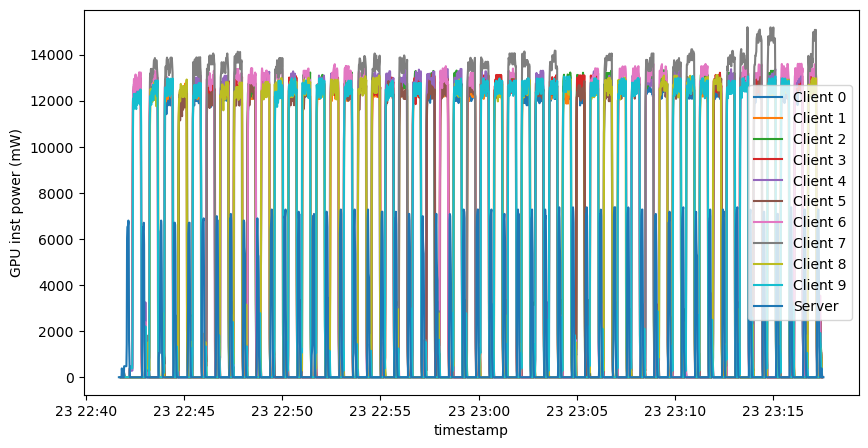

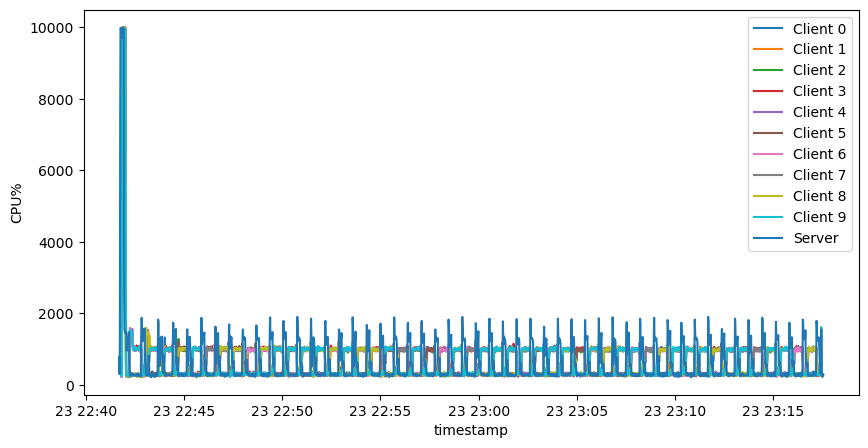

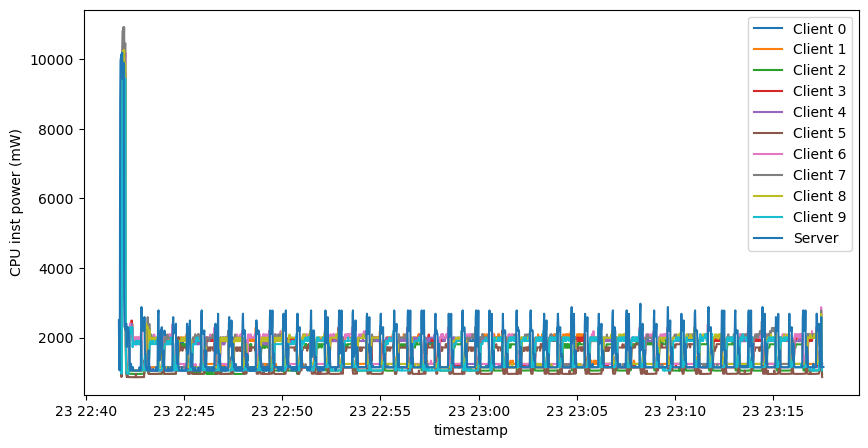

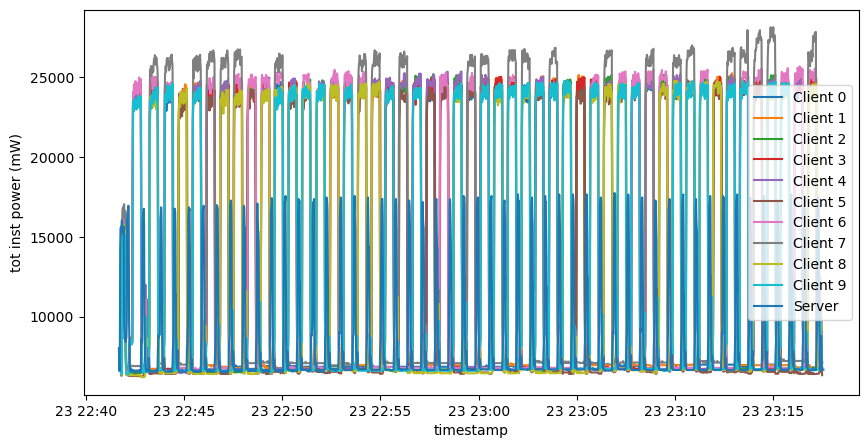

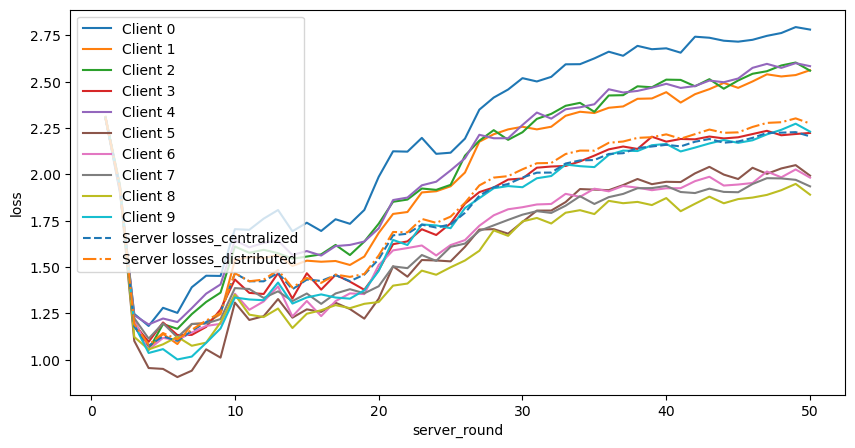

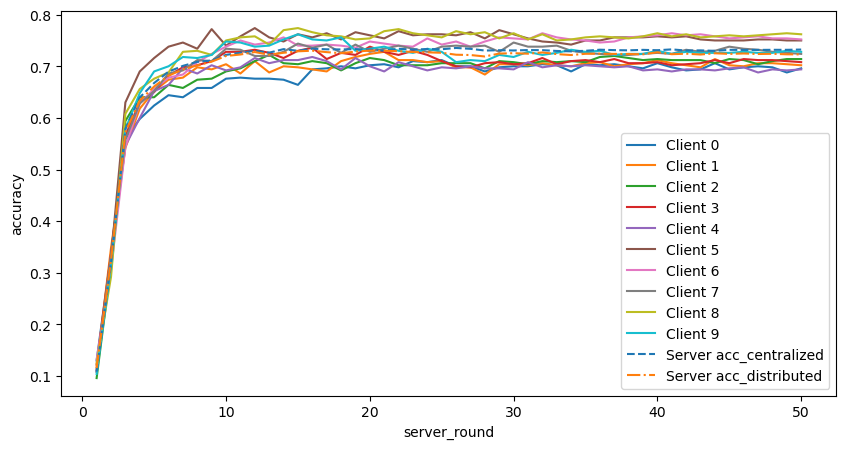

In [ ]:
result_plot = {"loss": ["results","server_round","loss","losses_centralized","losses_distributed"],
                    "accuracy": ["results","server_round","accuracy","acc_centralized","acc_distributed"]}
        
            
result = EnergyResult(result_folder, 10, "2024-01-23_22-41-33")
mycsv = result._read_client(5)
server = result._read_server()
result.make_energy_plot("energy",'timestamp',"RAM%")
result.make_energy_plot("energy",'timestamp',"GPU inst power (mW)")
result.make_energy_plot("energy",'timestamp',"CPU%")
result.make_energy_plot("energy",'timestamp',"CPU inst power (mW)")
result.make_energy_plot("energy",'timestamp',"tot inst power (mW)")
result.make_result_plot(**result_plot)

# Experiment energy

In [36]:
outputs_path = [
    "/home/mjay/energyfl/outputcifar10/fedyogi/labelskew",
    "/home/mjay/energyfl/outputcifar10/fedavg/labelskew",
    "/home/mjay/energyfl/outputcifar10/fedadam/labelskew",
    "/home/mjay/energyfl/outputcifar10/fedadagrad/labelskew"
]
results = pd.DataFrame()
for path in outputs_path:
    perf_summary = pd.read_csv(os.path.join(path,"perf_summary.csv"))
    exp_summary = pd.read_csv(os.path.join(path,"experiment_summary.csv"))
    exp_summary["exp_id"] = exp_summary["result_folder"].apply(lambda x: x.split("/")[-1])
    perf_summary["exp_id"] = perf_summary["result_folder"].apply(lambda x: x.split("/")[-1])
    summary = exp_summary.merge(perf_summary, on="exp_id")
    results = pd.concat([results, summary], ignore_index=True)

In [38]:
results.columns

Index(['result_folder_x', 'energy_file', 'server', 'sleep_duration',
       'neuralnet', 'strategy', 'optimizer', 'estats-11', 'estats-12',
       'estats-2', 'estats-3', 'estats-4', 'estats-5', 'estats-6', 'estats-7',
       'estats-8', 'estats-9', 'timestamps.start_experiment_before_sleep',
       'timestamps.start_experiment', 'timestamps.end_experiment',
       'timestamps.end_experiment_after_sleep', 'params.num_rounds',
       'params.num_clients_per_round_fit', 'params.num_clients_per_round_eval',
       'params.min_available_clients', 'params.fraction_fit',
       'params.fraction_evaluate', 'params.wait_round', 'params.lr',
       'params.num_groups', 'data.data_name', 'data.batch_size',
       'data.validation_split', 'data.num_clients', 'data.alpha',
       'data.partition', 'client.lr', 'client.local_epochs',
       'client.decay_rate', 'client.decay_steps', 'comm.host', 'comm.port',
       'exp_id', 'result_folder_y', 'clients_J', 'clients_kWh', 'server_J',
       'server_

In [43]:
parameters = [
    "strategy", 
    'params.wait_round', 
    'data.batch_size', 
    'client.lr',
    'client.local_epochs', 
    ]
results.groupby(parameters)[["clients_kWh", "server_kWh"]].mean().style.background_gradient(cmap='viridis', low=0.2, high=0.2, axis=0)

## Studying energy per rounds

In [ ]:
result = EnergyResult(result_folder, 6, "2024-01-20","22-40-32","22-40-25")
clients = result._read_all_clients()
server = result._read_server()

In [ ]:
styled_df = clients[5].energy[["timestamp", "tot inst power"]].head(10).style.background_gradient(cmap='Blues', subset=['tot inst power'])
styled_df

,timestamp,tot inst power
0,2024-01-20 22:40:33.368284,8031
1,2024-01-20 22:40:34.339464,6690
2,2024-01-20 22:40:35.339331,6498
3,2024-01-20 22:40:36.353051,7361
4,2024-01-20 22:40:37.364970,14525
5,2024-01-20 22:40:38.372670,15188
6,2024-01-20 22:40:39.368352,15285
7,2024-01-20 22:40:40.370749,15325
8,2024-01-20 22:40:41.379587,15476
9,2024-01-20 22:40:42.370047,15636


In [ ]:
clients[5].fittimes.head(10)

,Client ID,Server Round,Start Time,End Time,fittime
0,5,1,2024-01-20 22:40:55,2024-01-20 22:41:23,28.0
1,5,2,2024-01-20 22:41:34,2024-01-20 22:41:58,24.0
2,5,3,2024-01-20 22:42:14,2024-01-20 22:42:33,19.0
3,5,4,2024-01-20 22:42:44,2024-01-20 22:43:03,19.0
4,5,5,2024-01-20 22:43:13,2024-01-20 22:43:33,20.0
5,5,6,2024-01-20 22:43:46,2024-01-20 22:44:06,20.0
6,5,7,2024-01-20 22:44:16,2024-01-20 22:44:36,20.0
7,5,8,2024-01-20 22:44:45,2024-01-20 22:45:05,20.0
8,5,9,2024-01-20 22:45:14,2024-01-20 22:45:34,20.0
9,5,10,2024-01-20 22:45:44,2024-01-20 22:46:03,19.0


In [ ]:
for client_id in range(6):
    for round_id in range(len(clients[client_id].fittimes)):
        start_time, end_time = clients[client_id].fittimes.at[round_id,"Start Time"], clients[client_id].fittimes.at[round_id,"End Time"]
        energy_df = clients[client_id].energy[(clients[client_id].energy["timestamp"]>=start_time) & (clients[client_id].energy["timestamp"]<=end_time)]
        energy_kWh, energy_J = compute_energy(energy_df)
        clients[client_id].fittimes.at[round_id,"energy_kWh"] = energy_kWh
        clients[client_id].fittimes.at[round_id,"energy_J"] = energy_J

In [ ]:
clients[client_id].fittimes.style.background_gradient(cmap='plasma', subset=['energy_J'])

,Client ID,Server Round,Start Time,End Time,fittime,energy_kWh,energy_J
0,5,1,2024-01-20 22:40:55,2024-01-20 22:41:23,28.000000,0.000105,377.978695
1,5,2,2024-01-20 22:41:34,2024-01-20 22:41:58,24.000000,0.000096,346.762496
2,5,3,2024-01-20 22:42:14,2024-01-20 22:42:33,19.000000,0.000083,300.077939
3,5,4,2024-01-20 22:42:44,2024-01-20 22:43:03,19.000000,0.000084,304.135106
4,5,5,2024-01-20 22:43:13,2024-01-20 22:43:33,20.000000,0.000087,312.627441
5,5,6,2024-01-20 22:43:46,2024-01-20 22:44:06,20.000000,0.000086,309.697191
6,5,7,2024-01-20 22:44:16,2024-01-20 22:44:36,20.000000,0.000087,312.180015
7,5,8,2024-01-20 22:44:45,2024-01-20 22:45:05,20.000000,0.000088,315.868189
8,5,9,2024-01-20 22:45:14,2024-01-20 22:45:34,20.000000,0.000088,317.257057
9,5,10,2024-01-20 22:45:44,2024-01-20 22:46:03,19.000000,0.000085,306.259591


In [ ]:
clients[client_id].fittimes["energy_kWh"].agg(["sum","mean","std"])

sum     0.001749
mean    0.000087
std     0.000005
Name: energy_kWh, dtype: float64

In [ ]:
energy_df.style.background_gradient(cmap='viridis', subset=['tot inst power'])

,timestamp,RAM%,GPU%,GPU inst power,GPU avg power,CPU%,CPU inst power,CPU avg power,tot inst power,tot avg power
604,2024-01-20 22:50:37.666905,12,0.000000,1057,907,4.620000,1537,1549,8369,8181
605,2024-01-20 22:50:38.669930,12,99.200000,6609,3758,13.250000,2202,1875,15771,11974
606,2024-01-20 22:50:39.672279,12,0.000000,7845,5801,12.750000,2200,2037,17193,14582
607,2024-01-20 22:50:40.671363,12,30.600000,7750,6775,12.870000,2200,2118,17136,15857
608,2024-01-20 22:50:41.671913,12,98.600000,7659,7217,12.500000,2296,2207,17238,16547
609,2024-01-20 22:50:42.672720,12,0.000000,8131,7673,12.750000,2200,2203,17749,17147
610,2024-01-20 22:50:43.671952,12,55.300000,7659,7666,12.370000,2200,2201,17047,17095
611,2024-01-20 22:50:44.672491,12,0.000000,8131,7898,12.500000,2200,2200,17709,17400
612,2024-01-20 22:50:45.672695,12,54.000000,7659,7779,12.620000,2200,2200,17047,17223
613,2024-01-20 22:50:46.672632,12,98.500000,7654,7716,12.250000,2296,2248,17136,17178
